In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# or load through local csv
data = pd.read_csv('data.csv')

In [5]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# types for the columns
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# numerical summary, only applies to numerical columns
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# number of instances in each class
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [9]:
# Take out a test set
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [10]:
# number of instances in each class in training data
train.groupby('species').size()

species
setosa        30
versicolor    30
virginica     30
dtype: int64

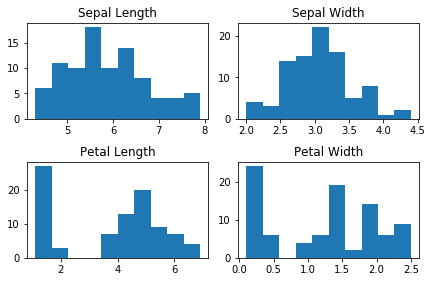

In [11]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

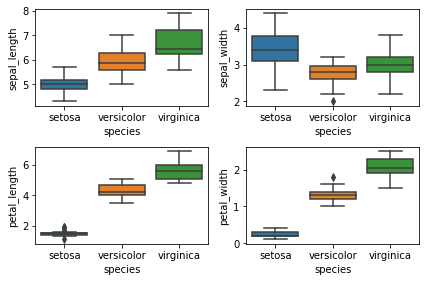

In [12]:
# boxplots using seaborn
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

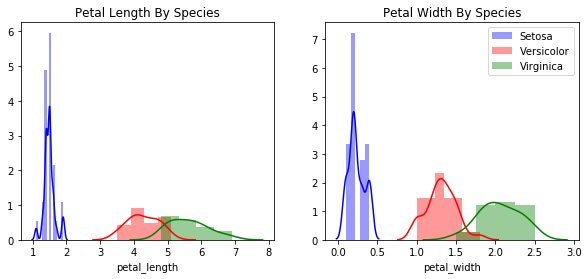

In [13]:
# right off the bat, we see that petal length/width can separate setosa from the others
# histogram by species
setosa_pl = train.loc[train.species=='setosa', 'petal_length']
versicolor_pl = train.loc[train.species=='versicolor', 'petal_length']
virginica_pl = train.loc[train.species=='virginica', 'petal_length']
setosa_pw = train.loc[train.species=='setosa', 'petal_width']
versicolor_pw = train.loc[train.species=='versicolor', 'petal_width']
virginica_pw = train.loc[train.species=='virginica', 'petal_width']

fig, axs = plt.subplots(1, 2)
# set figure size
fig.set_size_inches(10,4)
ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0]);
ax1.set_title('Petal Length By Species')
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0]);
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axs[0]);

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axs[1]);
ax2.set_title('Petal Width By Species')
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1]);
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axs[1]);

plt.legend();

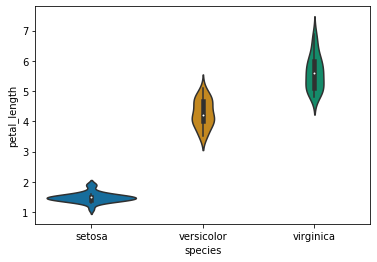

In [14]:
sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind');

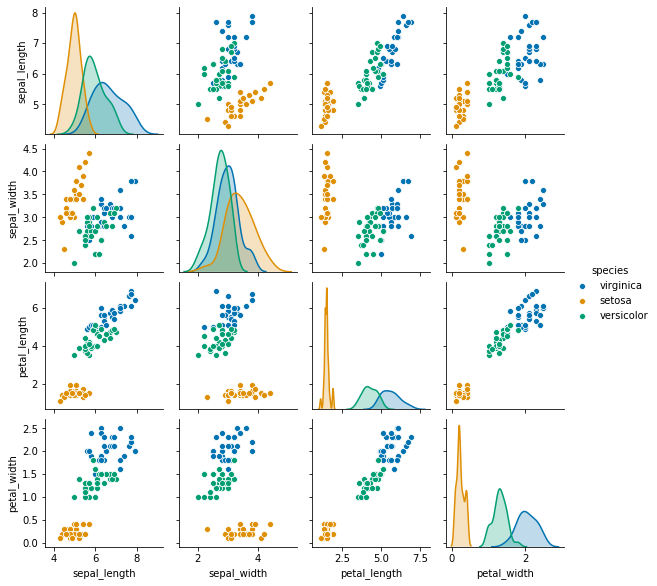

In [15]:
# bivariate relationship
# scatterplot matrix
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

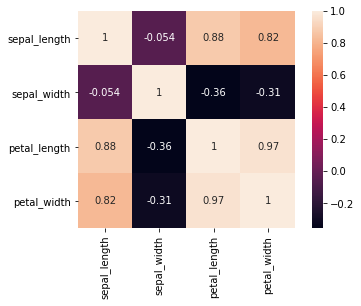

In [16]:
# correlation matrix
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

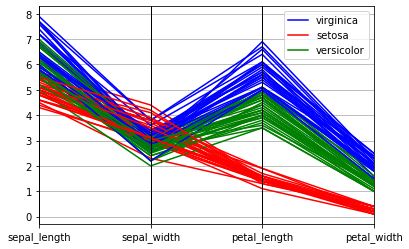

In [17]:
# parallel coordinates
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);

In [18]:
# Model development
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [19]:
# first try decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [20]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

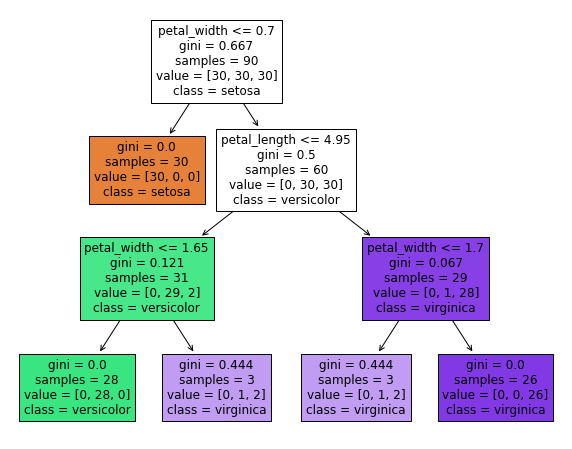

In [21]:
# set figure size
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

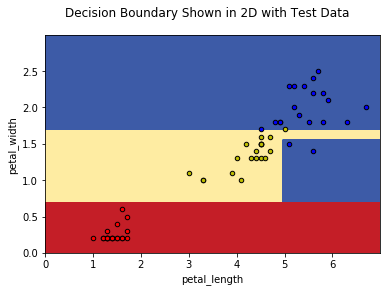

In [22]:
# plot decision boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

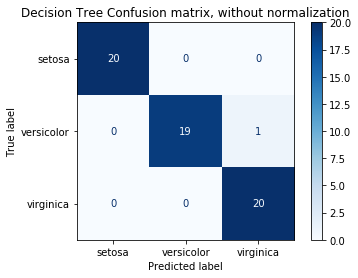

In [23]:
# confusion matrix
# one versicolor misclassified
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [24]:
# Guassian Naive Bayes Classifier
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.933


In [25]:
# Guassian Naive Bayes Classifier with two predictors
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is 0.950


In [26]:
# LDA Classifier
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier on test data is 0.983


In [27]:
# LDA Classifier with two predictors
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the LDA Classifier with two predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier with two predictors on test data is 0.933


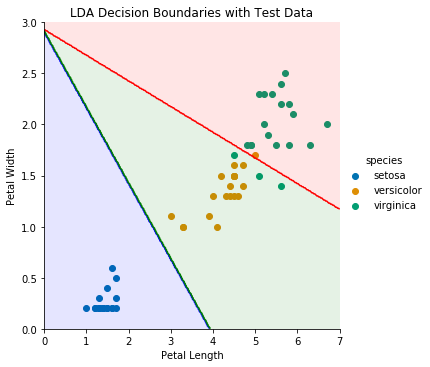

In [28]:
# LDA with 2 predictors
mod_lda_1 = LinearDiscriminantAnalysis()
y_pred = mod_lda_1.fit(X_train[selected_predictors], y_train_en).predict(X_test[selected_predictors])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_lda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Add axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('LDA Decision Boundaries with Test Data');

In [29]:
# QDA Classifier
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the QDA Classifier is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier is 0.983


In [30]:
# QDA Classifier with two predictors
mod_qda = QuadraticDiscriminantAnalysis()
y_pred = mod_qda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the QDA Classifier with two predictors is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier with two predictors is 0.967


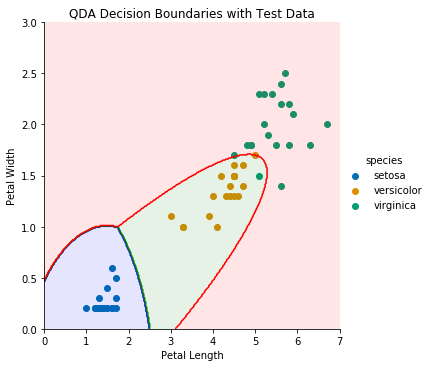

In [31]:
# QDA with 2 predictors
mod_qda_1 = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_1.fit(X_train.iloc[:,2:4], y_train_en).predict(X_test.iloc[:,2:4])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_qda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('QDA Decision Boundaries with Test Data');

In [32]:
# KNN, first try 5
mod_5nn=KNeighborsClassifier(n_neighbors=5) 
mod_5nn.fit(X_train,y_train)
prediction=mod_5nn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the 5NN Classifier is 0.933


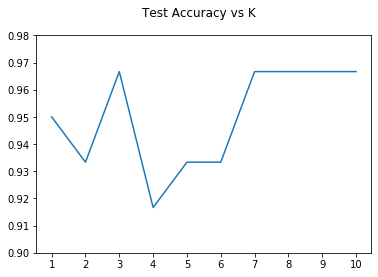

In [33]:
# try different k
acc_s = pd.Series(dtype = 'float')
for i in list(range(1,11)):
    mod_knn=KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train,y_train)
    prediction=mod_knn.predict(X_test)
    acc_s = acc_s.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
    
plt.plot(list(range(1,11)), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);

In [34]:
# SVC with linear kernel
# for SVC, may be impractical beyond tens of thousands of samples
linear_svc = SVC(kernel='linear').fit(X_train, y_train)
prediction=linear_svc.predict(X_test)
print('The accuracy of the linear SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the linear SVC is 1.000


In [35]:
# SVC with polynomial kernel
poly_svc = SVC(kernel='poly', degree = 4).fit(X_train, y_train)
prediction=poly_svc.predict(X_test)
print('The accuracy of the Poly SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Poly SVC is 0.933


In [36]:
# Logistic regression
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
prediction=mod_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Logistic Regression is 0.950
